In [164]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
df = pd.read_csv('data/transformed/dfs_junto.csv')

In [166]:
df = df.drop(df.columns[0], axis=1)
df

,ano,nome,indicada_gg,ganhou_gg,indicada_os,ganhou_os,indicada_sag,ganhou_sag,indicada_bafta,ganhou_bafta,indicada_critics,ganhou_critics
0,2014,Amy Adams,1,1,0,0,0,0,1,0,0,0
1,2014,Emily Blunt,1,0,0,0,0,0,0,0,0,0
2,2014,Felicity Jones,1,0,1,0,1,0,1,0,1,0
3,2014,Helen Mirren,1,0,0,0,0,0,0,0,0,0
4,2014,Jennifer Aniston,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
140,2024,Nicole Kidman,1,0,0,0,0,0,0,0,0,0
141,2024,Pamela Anderson,1,0,0,0,1,0,0,0,0,0
142,2024,Saoirse Ronan,0,0,0,0,0,0,1,0,0,0
143,2024,Tilda Swinton,1,0,0,0,0,0,0,0,0,0


In [167]:
print(f"df_gg tem {df.shape[0]} linhas")

df_gg tem 145 linhas


In [168]:
indicada_os = df.pop('indicada_os')
df['indicada_os'] = indicada_os

ganhou_os = df.pop('ganhou_os')
df['ganhou_os'] = ganhou_os

df

,ano,nome,indicada_gg,ganhou_gg,indicada_sag,ganhou_sag,indicada_bafta,ganhou_bafta,indicada_critics,ganhou_critics,indicada_os,ganhou_os
0,2014,Amy Adams,1,1,0,0,1,0,0,0,0,0
1,2014,Emily Blunt,1,0,0,0,0,0,0,0,0,0
2,2014,Felicity Jones,1,0,1,0,1,0,1,0,1,0
3,2014,Helen Mirren,1,0,0,0,0,0,0,0,0,0
4,2014,Jennifer Aniston,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
140,2024,Nicole Kidman,1,0,0,0,0,0,0,0,0,0
141,2024,Pamela Anderson,1,0,1,0,0,0,0,0,0,0
142,2024,Saoirse Ronan,0,0,0,0,1,0,0,0,0,0
143,2024,Tilda Swinton,1,0,0,0,0,0,0,0,0,0


In [169]:
#removendo as que n foram indicadas ao oscar nenhuma vez
df = df[df['indicada_os'] != 0]

#e a coluna 'indicada_os' q n precisamos mais
df = df.drop(columns=['indicada_os'])
df.head()

,ano,nome,indicada_gg,ganhou_gg,indicada_sag,ganhou_sag,indicada_bafta,ganhou_bafta,indicada_critics,ganhou_critics,ganhou_os
2,2014,Felicity Jones,1,0,1,0,1,0,1,0,0
5,2014,Julianne Moore,1,1,1,1,1,1,1,1,1
6,2014,Julianne Moore,1,0,1,1,1,1,1,1,1
7,2014,Marion Cotillard,0,0,0,0,0,0,1,0,0
9,2014,Reese Witherspoon,1,0,1,0,1,0,1,0,0


In [170]:
df_s_nome = df.drop(columns=['nome']).reset_index(drop=True)
df_s_nome.head()

,ano,indicada_gg,ganhou_gg,indicada_sag,ganhou_sag,indicada_bafta,ganhou_bafta,indicada_critics,ganhou_critics,ganhou_os
0,2014,1,0,1,0,1,0,1,0,0
1,2014,1,1,1,1,1,1,1,1,1
2,2014,1,0,1,1,1,1,1,1,1
3,2014,0,0,0,0,0,0,1,0,0
4,2014,1,0,1,0,1,0,1,0,0


In [171]:
matriz_correlacao = df_s_nome.corr()
matriz_correlacao

,ano,indicada_gg,ganhou_gg,indicada_sag,ganhou_sag,indicada_bafta,ganhou_bafta,indicada_critics,ganhou_critics,ganhou_os
ano,1.000000,0.089025,0.043059,0.008318,-0.053376,-0.182233,-0.084444,-0.262002,-0.063900,-0.126540
indicada_gg,0.089025,1.000000,0.215499,0.517662,0.163517,0.389249,0.154807,0.296472,0.172162,0.154807
ganhou_gg,0.043059,0.215499,1.000000,0.070924,0.479234,0.083883,0.429645,0.114793,0.346083,0.429645
indicada_sag,0.008318,0.517662,0.070924,1.000000,0.315877,0.669372,0.299050,0.181592,0.332576,0.299050
ganhou_sag,-0.053376,0.163517,0.479234,0.315877,1.000000,0.152758,0.399035,0.180907,0.537477,0.618112
indicada_bafta,-0.182233,0.389249,0.083883,0.669372,0.152758,1.000000,0.397706,0.194212,0.269087,0.305675
ganhou_bafta,-0.084444,0.154807,0.429645,0.299050,0.399035,0.397706,1.000000,0.171270,0.473359,0.773737
indicada_critics,-0.262002,0.296472,0.114793,0.181592,0.180907,0.194212,0.171270,1.000000,0.190471,0.171270
ganhou_critics,-0.063900,0.172162,0.346083,0.332576,0.537477,0.269087,0.473359,0.190471,1.000000,0.473359
ganhou_os,-0.126540,0.154807,0.429645,0.299050,0.618112,0.305675,0.773737,0.171270,0.473359,1.000000


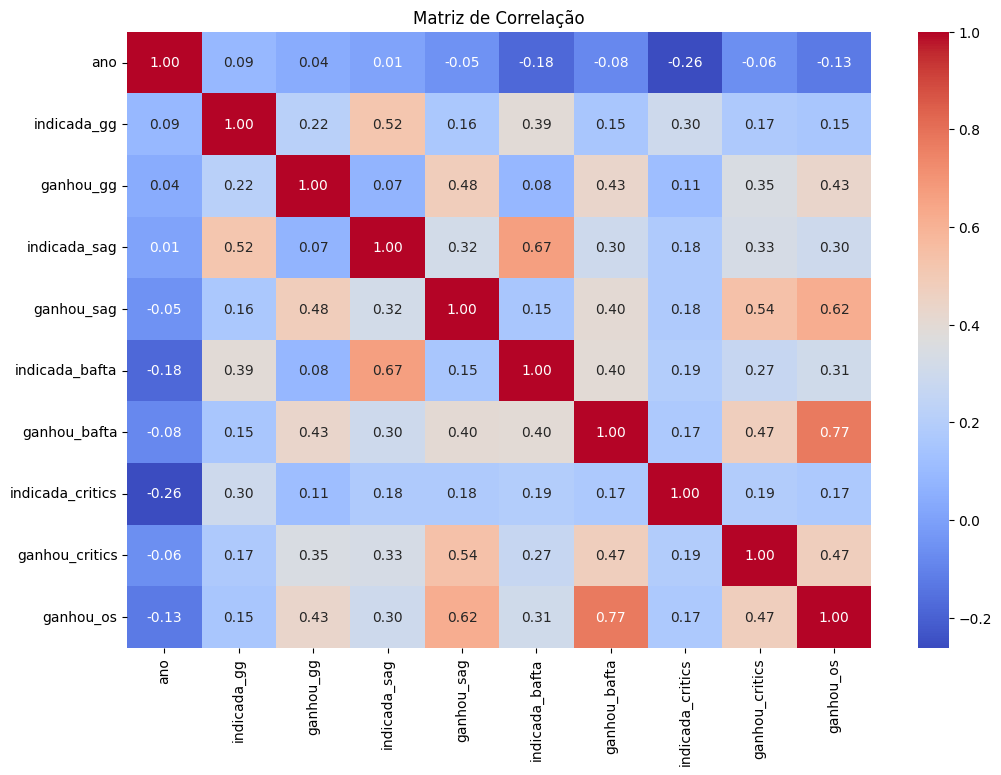

In [172]:
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

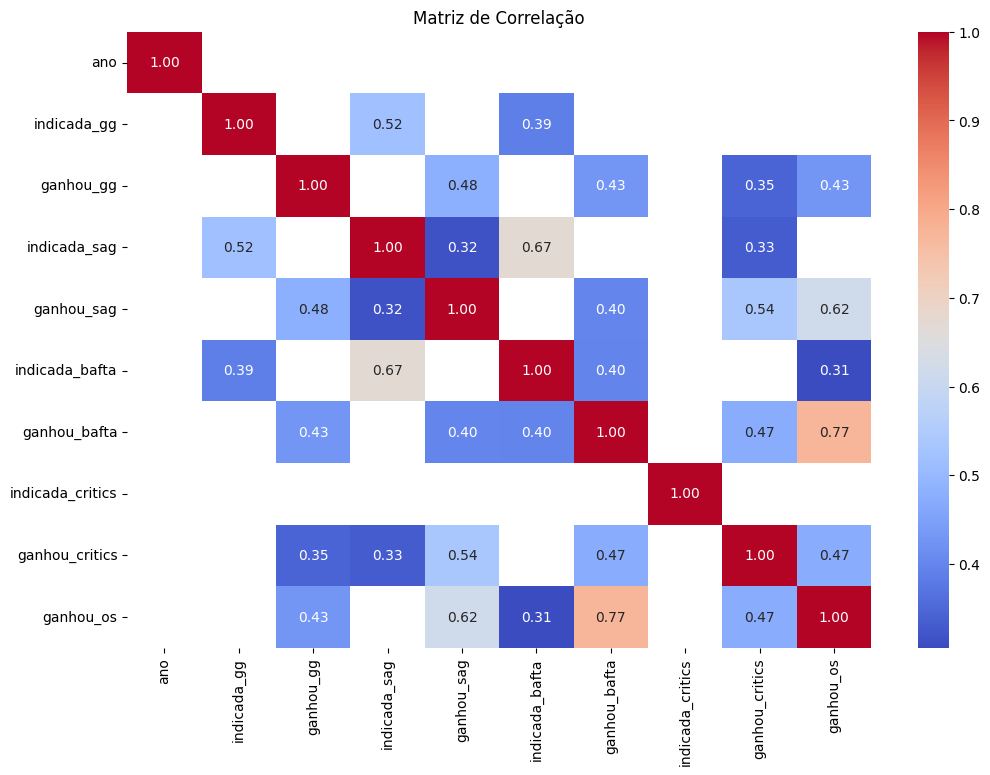

In [173]:
#somente as de maior correlação (> 0.3)
matriz_correlacao_filtrada = matriz_correlacao[matriz_correlacao > 0.3].dropna(how='all', axis=0).dropna(how='all', axis=1)

plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacao_filtrada, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

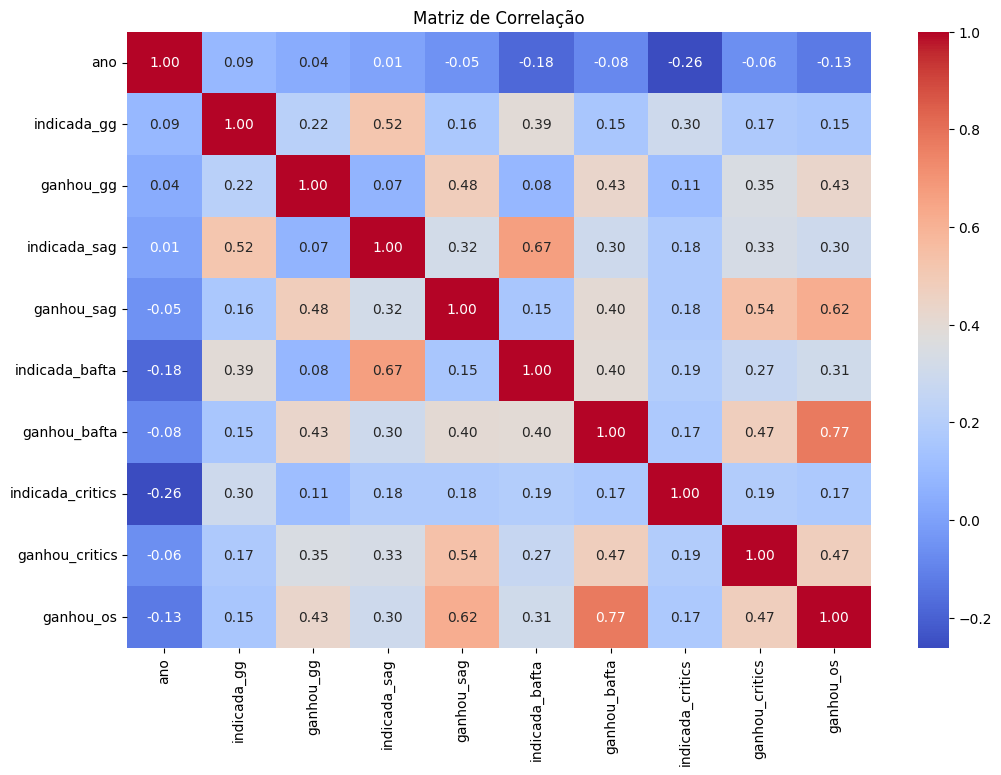

In [174]:
cols_to_drop = [col for col in df_s_nome.columns if col.startswith('participou_')]
df_maior_corr = df_s_nome.drop(columns=cols_to_drop)

plt.figure(figsize=(12, 8))
sns.heatmap(df_maior_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

In [175]:
#vai ficar para cada treinamento

'''#tirando as divas de 2024

remover = df_oscar[df_oscar['participou_2024'] == 1]
remover

df_maior_corr = df_maior_corr[~df_maior_corr['nome'].isin(remover['nome'])].reset_index(drop=True)
df_maior_corr
'''

"#tirando as divas de 2024\n\nremover = df_oscar[df_oscar['participou_2024'] == 1]\nremover\n\ndf_maior_corr = df_maior_corr[~df_maior_corr['nome'].isin(remover['nome'])].reset_index(drop=True)\ndf_maior_corr\n"

In [176]:
df.head()

,ano,nome,indicada_gg,ganhou_gg,indicada_sag,ganhou_sag,indicada_bafta,ganhou_bafta,indicada_critics,ganhou_critics,ganhou_os
2,2014,Felicity Jones,1,0,1,0,1,0,1,0,0
5,2014,Julianne Moore,1,1,1,1,1,1,1,1,1
6,2014,Julianne Moore,1,0,1,1,1,1,1,1,1
7,2014,Marion Cotillard,0,0,0,0,0,0,1,0,0
9,2014,Reese Witherspoon,1,0,1,0,1,0,1,0,0


In [177]:
df.to_csv('data/final/df_final.csv')
print('Salvo')

Salvo
